In [1]:
from random import shuffle

import matplotlib.pyplot as plt
from ase.calculators.emt import EMT
from ase.cluster import Octahedron
from ase.visualize import view
from sklearn.linear_model import Ridge

from npl.calculators import TrainedCalculator
from npl.core import Nanoparticle as nano
from npl.descriptors import Topologies
from npl.global_optimization.operations import GuidedExchangeOperator
from npl.utils import (compute_bond_types,
                       compute_coefficients_for_linear_topological_model)

In [2]:
symbols = ['Au']*150+['Pt']*100+['Pd']*155
system = Octahedron('Pt', 9, 3)
system.calc = EMT()
training_set = []

for _ in range(5):
    shuffle(symbols)
    system.symbols = symbols
    system.get_potential_energy()
    p = nano.from_atoms(system)
    top = Topologies(p.get_unique_atomic_numbers())
    top.get_feature_vector(p)
    training_set.append(p)

c = TrainedCalculator('TOP', Ridge)
c.fit(training_set)
coef = c.get_coefficients()

In [4]:
shuffle(symbols)

[-0.51919542  0.         -0.21770022] [-0.28712418 -0.10478713  0.        ]


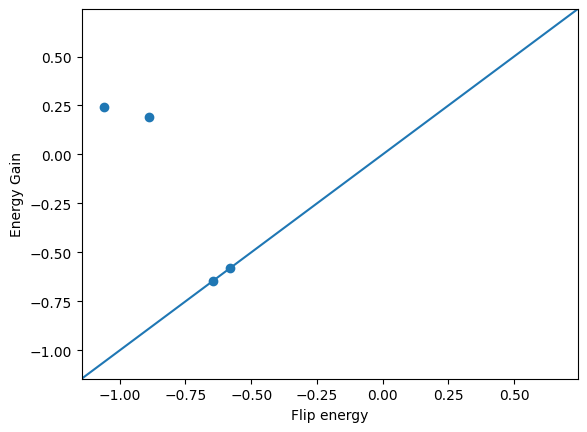

In [7]:
system.symbols = symbols
system.get_potential_energy()
p = nano.from_atoms(system)
top = Topologies(p.get_unique_atomic_numbers())
top.get_feature_vector(p)

coefficients, total_energy, feature_index_values = compute_coefficients_for_linear_topological_model(coef, training_set[1].get_unique_atomic_numbers())
exchange = GuidedExchangeOperator(p, total_energy, feature_index_values)

a, b = exchange.find_best_swap_pair()[0]
print(exchange.exchange_energies[a] ,exchange.exchange_energies[b])

old_energy = c.calculate_total(p)

flips = []
gains = []
for _ in range(5):
    flip_energy = exchange.perform_operation(p)*2
    top.get_feature_vector(p)
    new_energy = c.calculate_total(p)
    energy_gain =  new_energy - old_energy
    old_energy = new_energy
    
    flips.append(flip_energy)
    gains.append(energy_gain)


plt.scatter(flips, gains)
plt.xlabel('Flip energy')
plt.ylabel('Energy Gain')
plt.xlim(min(gains)-0.5,max(gains)+0.5)
plt.ylim(min(gains)-0.5,max(gains)+0.5)
plt.plot([-10,10],[-10,10])
plt.show()

In [8]:
flips, gains

([-0.6449746890771426,
  -0.5801147286973969,
  -1.0610634288575842,
  -0.8906450038956414,
  -1.255901450727081],
 [array([-0.64497469]),
  array([-0.58011473]),
  array([0.2419302]),
  array([0.19367334]),
  array([-0.41176628])])

In [ ]:
feature_index_values

{46: {(0, 0, 0): 0,
  (1, 0, 0): 1,
  (0, 1, 0): 2,
  (0, 0, 1): 3,
  (2, 0, 0): 4,
  (1, 1, 0): 5,
  (1, 0, 1): 6,
  (0, 2, 0): 7,
  (0, 1, 1): 8,
  (0, 0, 2): 9,
  (3, 0, 0): 10,
  (2, 1, 0): 11,
  (2, 0, 1): 12,
  (1, 2, 0): 13,
  (1, 1, 1): 14,
  (1, 0, 2): 15,
  (0, 3, 0): 16,
  (0, 2, 1): 17,
  (0, 1, 2): 18,
  (0, 0, 3): 19,
  (4, 0, 0): 20,
  (3, 1, 0): 21,
  (3, 0, 1): 22,
  (2, 2, 0): 23,
  (2, 1, 1): 24,
  (2, 0, 2): 25,
  (1, 3, 0): 26,
  (1, 2, 1): 27,
  (1, 1, 2): 28,
  (1, 0, 3): 29,
  (0, 4, 0): 30,
  (0, 3, 1): 31,
  (0, 2, 2): 32,
  (0, 1, 3): 33,
  (0, 0, 4): 34,
  (5, 0, 0): 35,
  (4, 1, 0): 36,
  (4, 0, 1): 37,
  (3, 2, 0): 38,
  (3, 1, 1): 39,
  (3, 0, 2): 40,
  (2, 3, 0): 41,
  (2, 2, 1): 42,
  (2, 1, 2): 43,
  (2, 0, 3): 44,
  (1, 4, 0): 45,
  (1, 3, 1): 46,
  (1, 2, 2): 47,
  (1, 1, 3): 48,
  (1, 0, 4): 49,
  (0, 5, 0): 50,
  (0, 4, 1): 51,
  (0, 3, 2): 52,
  (0, 2, 3): 53,
  (0, 1, 4): 54,
  (0, 0, 5): 55,
  (6, 0, 0): 56,
  (5, 1, 0): 57,
  (5, 0, 1): 58,
  (